In [142]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
import statistics
import copy
%matplotlib inline

##### Поля в выборке
1. **satisfaction_level** - Уровень удовлетворенности работой   
2. **Last_evaluation** - Время с момента последней оценки в годах   
3. **number_projects** - Количество проектов, выполненных за время работы   
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц   
5. **time_spend_company** - Стаж работы в компании в годах   
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником   
7. **left** - уволился ли сотрудник   
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет   
9. **department** - отдел в котором работает сотрудник    
10. **salary** - относительный уровень зарплаты    

####  <span style="color:blue">Загрузите файл HR.csv в pandas dataframe</span> ####

In [74]:
# Загружаем выборку
df=pd.read_csv('hr_new.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [75]:
# Количество отсутсвующих значений
df.isnull().sum(axis = 0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [76]:
# Вместо сравнительных(буквеные) значений обозначения зарплаты назначаем цифры
def salary_rep (x):
    if x == 'low':
        return 1
    elif x == 'medium':
        return 2
    elif x == 'high':
        return 3

df['salary_num'] = df['salary'].apply(salary_rep)

#### <span style="color:blue"> Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)</span> ####

In [77]:
def indicators(name):
    """Функция выводит показатели по столбцу:
    медиана, мода, математическое ожидание, дисперсия, максимум/минимум, размах"""
    
    print('Медиана: ', statistics.median(df[name]))
    print('Мода: ', statistics.mode(df[name]))
    print('Математическое ожидание: ', statistics.mean(df[name]))
    print('Стандартное отклонение: ', statistics.pstdev(df[name]))
    print('Дисперсия: ', statistics.pvariance(df[name]))
    print('-----------')
    print('Минимум: ', min(df[name]))
    print('Максимум: ', max(df[name]))
    print('Размах: ', max(df[name]) - min(df[name]))
    print('\n')
    
columns = list(df.columns.values) # Делаем список столбцов
del columns[8:10] # Удаляем название столбцов в которых не числовые значения


In [78]:
#Выводим список статистик для переменных 
for col in columns:
    print(col)
    indicators(col)

satisfaction_level
Медиана:  0.64
Мода:  0.1
Математическое ожидание:  0.6128335222348157
Стандартное отклонение:  0.2486223626820733
Дисперсия:  0.061813079225616394
-----------
Минимум:  0.09
Максимум:  1.0
Размах:  0.91


last_evaluation
Медиана:  0.72
Мода:  0.55
Математическое ожидание:  0.7161017401160077
Стандартное отклонение:  0.1711634045107436
Дисперсия:  0.029296911043708445
-----------
Минимум:  0.36
Максимум:  1.0
Размах:  0.64


number_project
Медиана:  4
Мода:  4
Математическое ожидание:  3.80305353690246
Стандартное отклонение:  1.2325512654823438
Дисперсия:  1.5191826220421274
-----------
Минимум:  2
Максимум:  7
Размах:  5


average_montly_hours
Медиана:  200
Мода:  135
Математическое ожидание:  201.0503366891126
Стандартное отклонение:  49.94143446256218
Дисперсия:  2494.146876178393
-----------
Минимум:  96
Максимум:  310
Размах:  214


time_spend_company
Медиана:  3
Мода:  3
Математическое ожидание:  3.498233215547703
Стандартное отклонение:  1.4600875552715114
Ди

**Или можно так**

In [79]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

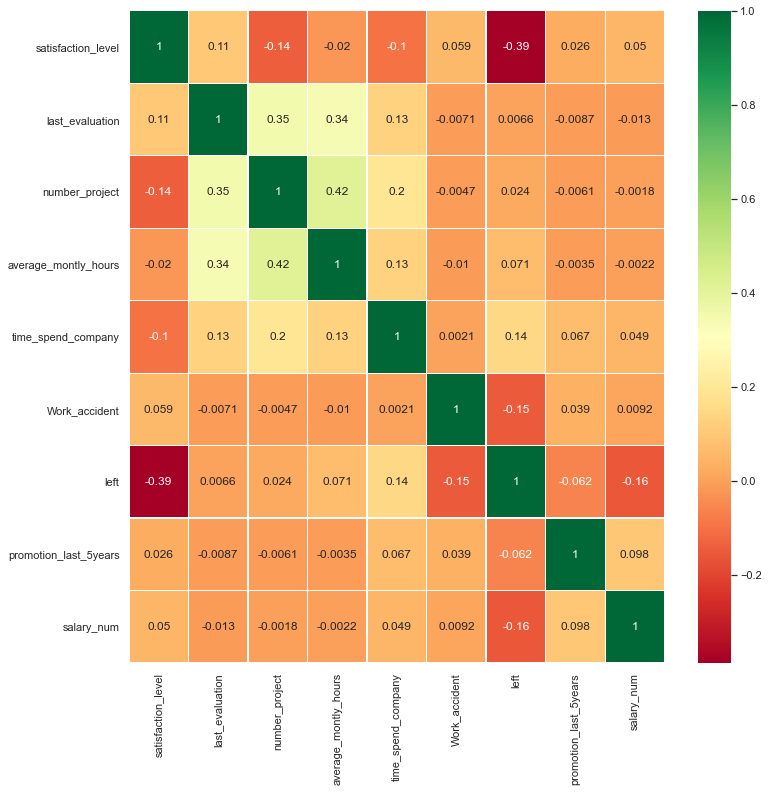

In [143]:
# Проверка на кореляции, каждого столбца, с каждым
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, annot_kws={"size": 12}) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

_Определите две самые скоррелированные_   
Количество проектов + средние часы в месяц **0.42**   
Количество проектов + последняя оценка **0.35**

_две наименеескоррелированные переменные_   
Уровень удовлетворенности + Уволен **-0.39**   
Уровень удовлетворенности + зарплата **-0.39**

##### Попробуем отдельно проверить, работающих и уволеных на кореляции

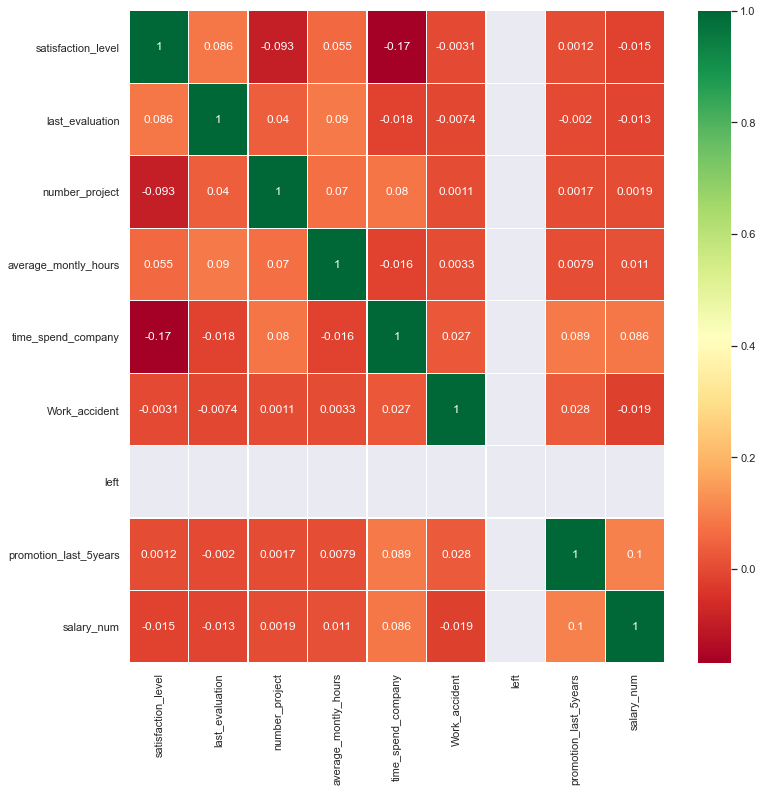

In [136]:
# Кореляции работающих людей
df_working = df.loc[df.left == 0]
sns.heatmap(df_working.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, annot_kws={"size": 12}) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

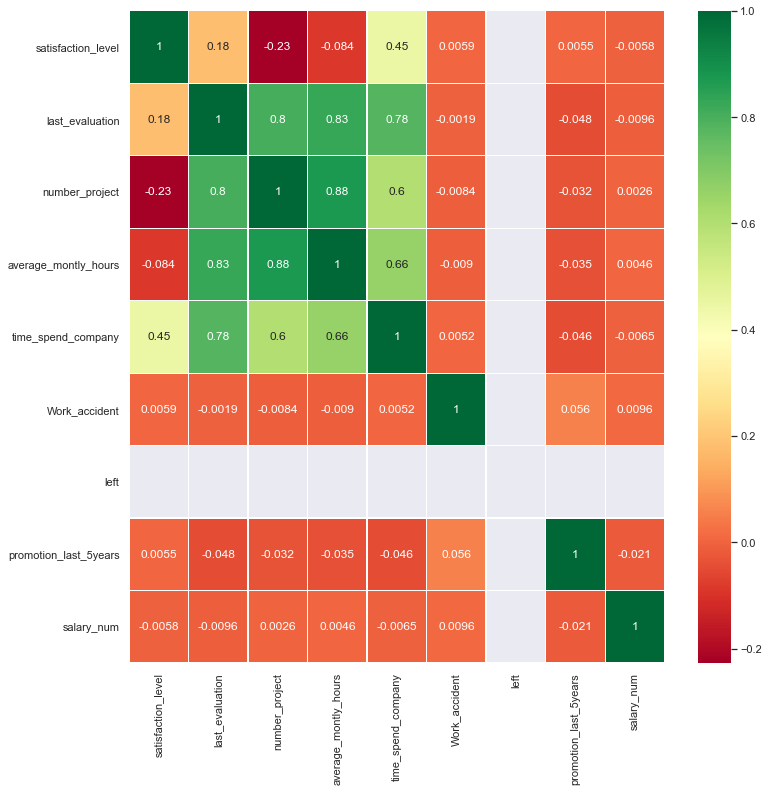

In [137]:
# Кореляции уволившихся людей
df_dismissed = df.loc[df.left == 1]
sns.heatmap(df_dismissed.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, annot_kws={"size": 12}) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

##### Это уже интереснее!
Количество проектов + средние часы в месяц **0.88**  
средние часы в месяц + последняя оценка **0.83**  
Количество проектов + последняя оценка **0.8**  
стаж в компании + последняя оценка **0.78**  
средние часы в месяц + стаж в компании **0.66**  
   
​
**Количество проектов, средние часы в месяц, последняя оценка и стаж в компании имеют прямую зависимость у уволившихся в компании.   
А у работающих такой зависимости не наблюдается.**

##### Сравним основные метрики у уволившихся и работающих

In [84]:
def indicators_dict_dism(name):
    """Функция, выводит словарь с индикаторами статистик (среднее,медиана,мода,мин/макс,сред.отклонение) среди уволившихся"""
    global  name_
    name_ = {}
#     name_['type'] = 'dismissed'
#     name_['stats'] = name
    name_['median'] = statistics.median(df_dismissed[name])
    name_['mode'] = statistics.mode(df_dismissed[name])
    name_['mean'] = statistics.mean(df_dismissed[name])
    name_['pstdev'] = statistics.pstdev(df_dismissed[name])
    name_['pvariance'] = statistics.pvariance(df_dismissed[name])
    name_['min'] = min(df_dismissed[name])
    name_['max'] = max(df_dismissed[name])
    name_['range'] = max(df_dismissed[name]) - min(df_dismissed[name])
    global dism 
    dism = pd.DataFrame.from_dict(name_, orient='index')
    return dism

def indicators_dict_work(name):
    """Функция, выводит словарь с индикаторами статистик (среднее,медиана,мода,мин/макс,сред.отклонение) среди работающих"""
    global  name_
    name_ = {}
#     name_['type'] = 'working'
#     name_['stats'] = name
    name_['median'] = statistics.median(df_working[name])
    name_['mode'] = statistics.mode(df_working[name])
    name_['mean'] = statistics.mean(df_working[name])
    name_['pstdev'] = statistics.pstdev(df_working[name])
    name_['pvariance'] = statistics.pvariance(df_working[name])
    name_['min'] = min(df_working[name])
    name_['max'] = max(df_working[name])
    name_['range'] = max(df_working[name]) - min(df_working[name])
    global work
    work = pd.DataFrame.from_dict(name_, orient='index')
    return work

def join_(dism, work):
    """Функция переводит абслоютные значения в относительные"""
    global join_df
    join_df = dism.join(work, lsuffix='_caller', rsuffix='_other')
    join_df.columns = ['dismissed', 'working']
    join_df[['dismissed', 'working']] = join_df[['dismissed', 'working']].apply(lambda x: x/x.sum(), axis=1).mul(100).round(3)   

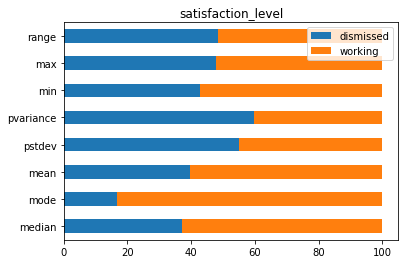

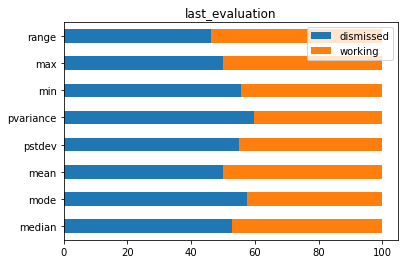

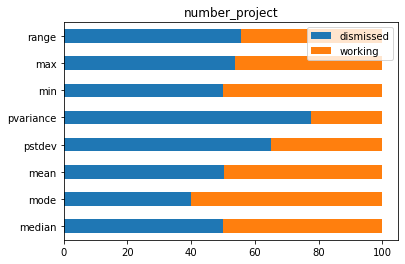

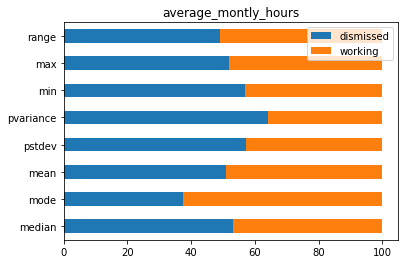

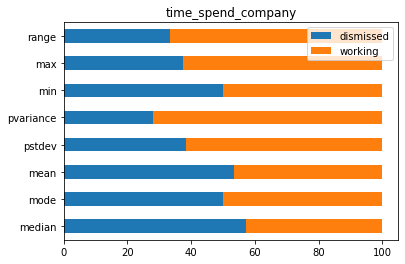

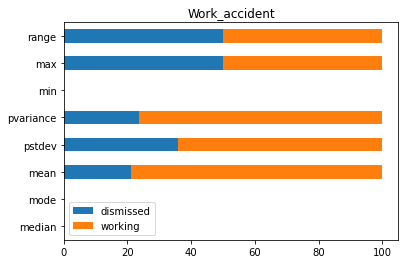

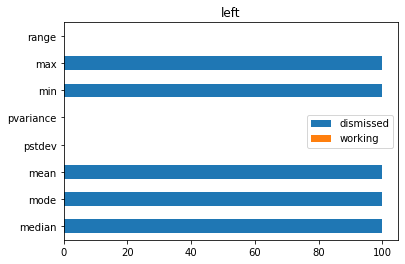

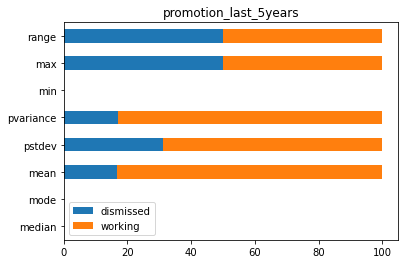

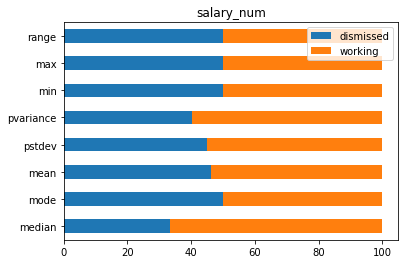

In [86]:
for col in columns:
    indicators_dict_dism(col)
    indicators_dict_work(col)
    join_(dism, work)
       

    join_df.plot.barh(stacked=True,);
    plt.title(col) 


####  <span style="color:blue">Рассчитайте сколько сотрудников работает в каждом департаменте</span> ####

In [87]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [88]:
dep_counts_df = df['department'].value_counts()
dep_counts_df = dep_counts_df.to_frame()
dep_counts_df = dep_counts_df.reset_index()
dep_counts_df.columns = ['Department', 'Num_employees']
    
dep_counts_df.style.bar()

,Department,Num_employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


####  <span style="color:blue">Показать распределение сотрудников по зарплатам</span> ####

In [89]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [90]:
salary_count = df['salary'].value_counts().to_frame().reset_index()
salary_count.columns = ['salary', 'count']
    
salary_count.style.bar()

,salary,count
0,low,7316
1,medium,6446
2,high,1237


####  <span style="color:blue">Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности</span> ####

In [91]:
df['type'] = 'working'

In [92]:
df_pivot = df.pivot_table(index='department', columns='salary', values='type',aggfunc=len, 
                       dropna=True, fill_value=0)  \
#        .reset_index().rename_axis(None, axis=1)
df_pivot = df_pivot[['low','medium', 'high']]
df_pivot = df_pivot.sort_values(by=['low','medium', 'high'], ascending=False)

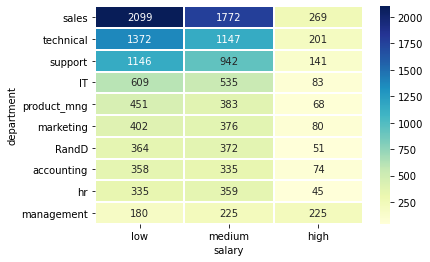

In [93]:
# Показать распределение сотрудников по зарплатам совместно с департаментами
df_pivot_heatmap = sns.heatmap(df_pivot, cmap="YlGnBu", linewidths=1, fmt='d', annot_kws={"size": 10}, annot=True)

####  <span style="color:blue">Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом</span> ####

In [94]:
high_salary_worker = df[df['salary']=='high']['average_montly_hours']
low_salary_worker = df[df['salary']=='low']['average_montly_hours']
print(stats.ttest_ind(high_salary_worker, low_salary_worker))

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)


**p-value равно _0.46,_ что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие времени проведенного на работе, между работниками с высоким и низким окладом.**

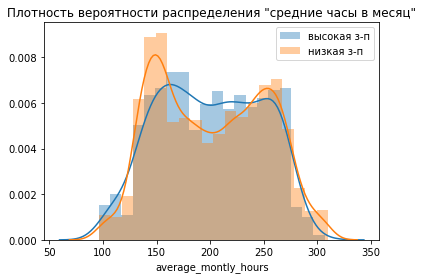

In [95]:
sns.distplot(high_salary_worker, 20)
sns.distplot(low_salary_worker, 20)
plt.title('Плотность вероятности распределения "средние часы в месяц"')
plt.legend(['высокая з-п', 'низкая з-п'])
plt.show()

**А проверим гипотезу, по количеству проектов у сотрудников с полярными окладами**

Ttest_indResult(statistic=-0.8473615354719396, pvalue=0.3968173527404072)


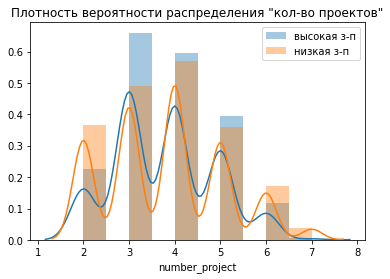

In [96]:
high_salary_worker_np = df[df['salary']=='high']['number_project']
low_salary_worker_np = df[df['salary']=='low']['number_project']
print(stats.ttest_ind(high_salary_worker_np, low_salary_worker_np))

sns.distplot(high_salary_worker_np, 10)
sns.distplot(low_salary_worker_np, 10)
plt.title('Плотность вероятности распределения "кол-во проектов"')
plt.legend(['высокая з-п', 'низкая з-п'])
plt.show()

**Аналогичная ситуация, не имеется статистического различия**

####  <span style="color:blue">Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):</span> ####

In [97]:
df_working = df.loc[df.left == 0]
df_dismissed = df.loc[df.left == 1]

####  <span style="color:blue">Доля сотрудников с повышением за последние 5 лет</span> ####


Доля сотрудников с повышением за последние 5 лет:
среди уволившихся 0.53 %,
среди работающих 2.63 %




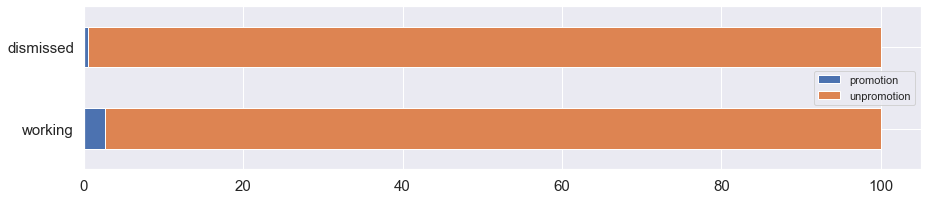

In [126]:
promotion = [len(df_working.loc[df.promotion_last_5years == 1]), len(df_dismissed.loc[df.promotion_last_5years == 1])]
unpromotion = [len(df_working.loc[df.promotion_last_5years == 0]), len(df_dismissed.loc[df.promotion_last_5years == 0])]
index = ['working', 'dismissed']
promo_df = pd.DataFrame({'promotion': promotion,
                   'unpromotion': unpromotion}, index=index)
promo_df[['promotion', 'unpromotion']] = promo_df[['promotion', 'unpromotion']].apply(lambda x: x/x.sum(), axis=1).mul(100).round(2)
print(f"""
Доля сотрудников с повышением за последние 5 лет:
среди уволившихся {promo_df.loc['dismissed', 'promotion']} %,
среди работающих {promo_df.loc['working', 'promotion']} %

""")
plt.rcParams.update({'font.size': 30})
promo_df.plot.barh(stacked=True, figsize=(15,3),fontsize=15, title='')
# plt.title('Доля сотрудников с повышением за последние 5 лет')

####  <span style="color:blue">Средняя степень удовлетворенности</span> ####

In [99]:
print('Математическое ожидание:')
print('работающие: ', statistics.mean(df_working['satisfaction_level']))
print('уволившихся: ', statistics.mean(df_dismissed['satisfaction_level']))
print()
print('Мода: ')
print('работающие: ', statistics.mode(df_working['satisfaction_level']))
print('уволившихся: ', statistics.mode(df_dismissed['satisfaction_level']))
print()
print('Медиана: ')
print('работающие: ', statistics.median(df_working['satisfaction_level']))
print('уволившихся: ', statistics.median(df_dismissed['satisfaction_level']))





Математическое ожидание:
работающие:  0.6668095904795239
уволившихся:  0.4400980117614114

Мода: 
работающие:  0.5
уволившихся:  0.1

Медиана: 
работающие:  0.69
уволившихся:  0.41


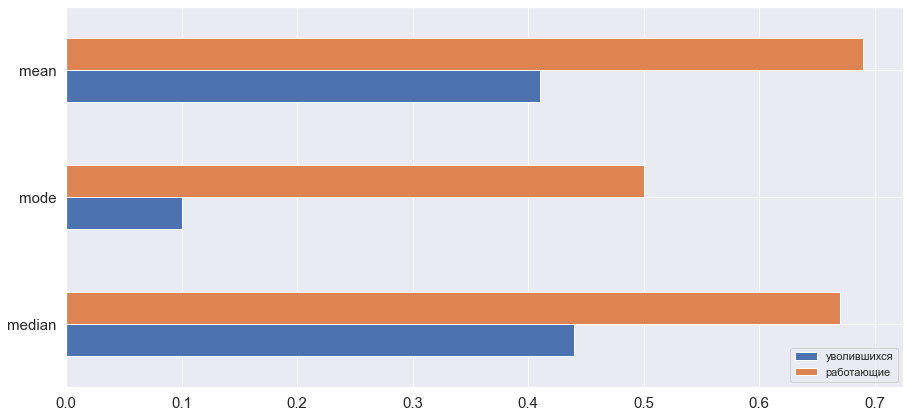

In [127]:
dismissed = [statistics.mean(df_dismissed['satisfaction_level']), statistics.mode(df_dismissed['satisfaction_level']), statistics.median(df_dismissed['satisfaction_level'])]
working = [statistics.mean(df_working['satisfaction_level']), statistics.mode(df_working['satisfaction_level']), statistics.median(df_working['satisfaction_level'])]
index = ['median', 'mode','mean']
mean_df = pd.DataFrame({'уволившихся': dismissed,
                   'работающие': working}, index=index).round(2)
mean_df.plot.barh(figsize=(15,7), fontsize=15)

**Средняя степень удовлетворенности выше, по всем параметрам, у работающих**

####  <span style="color:blue">Среднее количество проектов</span> ####

In [128]:
def status_ (x):
    if x == 1:
        return 'dismissed'
    elif x == 0:
        return 'working'


df['employment_status'] = df['left'].apply(status_)

In [129]:
# Сумма проектов среди уволившихся и не уволившихся сотрудников

In [130]:
employment_status_number_project = df.groupby('employment_status')[['number_project']].sum()\
    .sort_values('number_project', ascending=False) 

employment_status_number_project

,number_project
employment_status,
working,43274
dismissed,13768


In [131]:
# Среднее количество проектов среди уволившихся и не уволившихся сотрудников

In [132]:
df.groupby('employment_status')[['number_project']].mean().round(2) 

,number_project
employment_status,
dismissed,3.86
working,3.79


In [133]:
print('Математическое ожидание:')
print('работающие: ', statistics.mean(df_working['number_project']))
print('уволившихся: ', statistics.mean(df_dismissed['number_project']))
print()
print('Мода: ')
print('работающие: ', statistics.mode(df_working['number_project']))
print('уволившихся: ', statistics.mode(df_dismissed['number_project']))
print()
print('Медиана: ')
print('работающие: ', statistics.median(df_working['number_project']))
print('уволившихся: ', statistics.median(df_dismissed['number_project']))

Математическое ожидание:
работающие:  3.786664333216661
уволившихся:  3.8555026603192384

Мода: 
работающие:  3
уволившихся:  2

Медиана: 
работающие:  4.0
уволившихся:  4


**Интересно получилоось, наиболее часто встречающееся количество проектов у рабоающих больше.
Посмотрим распределение**

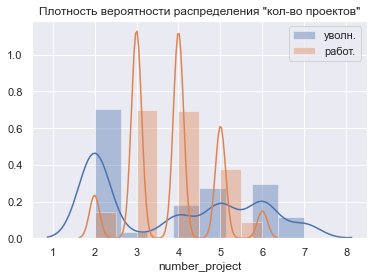

In [134]:
dismissed_PRJ = df[df['left']==1]['number_project']
working_PR = df[df['left']==0]['number_project']
# print(stats.ttest_ind(dismissed_PRJ, working_PR))

sns.distplot(dismissed_PRJ, 8)
sns.distplot(working_PR, 8)
sns.set(rc={"figure.figsize": (15, 7)})
plt.title('Плотность вероятности распределения "кол-во проектов"')
plt.legend(['уволн.', 'работ.'])
plt.show()

**И действительно у работающих часто встречаются 3 и 4 проекта, а у уволившихся 2.**

####  <span style="color:blue">Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки</span> ####

In [280]:
data=pd.read_csv('hr_new.csv')


In [281]:
# Удаляем нечисловые значения
del data['department']
del data['salary']

In [282]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [299]:
# Разделяем данные на данные для обучения и данные для проверки
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2) #0.2 - 20% процентов данных на обучение

In [300]:
# отделяем предикторы(по каким даным пердказывают предсказываю) от значений целевой переменной(в данном dataframe столбец 'left') 
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [301]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Импортируем класс - "Линейный дискриминантный анализ"
lda = LinearDiscriminantAnalysis()

In [302]:
lda.fit(data_train, y_train) #Обучаем на наших данных 

LinearDiscriminantAnalysis()

In [303]:
lda.predict(data_test) #Предсказание, для кажой трочки данных вернулось предсказанное значение 'left'

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [304]:
#Соеденяем наши данные и те что предказали, для просмотра, качества предсказания. 
# "T" транспонирует из строкового представления в столбец 
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [305]:
# Фукция "accuracy_score" считает точность предсказания от 0.0 до 1.0
from sklearn.metrics import accuracy_score 
accuracy_score(y_test.values, lda.predict(data_test))

0.7603333333333333

In [306]:
# Значения коэфициента предиктора. Чем значение больше, те важнее он для оценки, к целевой группе отнести
lda.coef_

array([[-4.58295181e+00,  6.55462677e-01, -2.33839342e-01,
         4.29633883e-03,  2.32863018e-01, -1.06394332e+00,
        -1.17860876e+00]])

### Точность предсказаний полученой LDA модели **76%** ####

####  <span style="color:gray">Не совсем понятно, как это применить к датафрейму, чтоб посмотреть потенциальных "уволившихся"</span>  ####